# Assignment 1 sorting algorithms

This notebook contains python implementations of sorting algorithms and plots of sorting time

In [ ]:
import time
from random import randint
import matplotlib.pyplot as plt

In [100]:
def insertion_sort(array):
    for j in range(1, len(array)):
        key = array[j]
        i = j
        while i > 0 and array[i-1] > key:
            array[i] = array[i -1]
            i-=1
            array[i] = key

In [101]:
def merge(array, p,q,r):
    n1 = q - p
    n2 = r - q

    l_array = array[p:q]
    r_array = array[q:r]

    (i,j,k) = (0,0,p)
    while i < n1 and j < n2:
        if l_array[i] <= r_array[j]:
            array[k] = l_array[i]
            i+=1
        else:
            array[k] = r_array[j]
            j+=1
        k +=1
    
    while i < n1:
        array[k] = l_array[i]
        i+=1
        k+=1
    
    while j < n2:
        array[k] = r_array[j]
        j+=1
        k+=1
    

def merge_sort(array, p ,r):
    if p < r- 1:
        q = (r+p)//2
        merge_sort(array, p, q)
        merge_sort(array, q, r)
        merge(array, p,q,r)
    
    

In [53]:
def heapify(array, idx, heapsize):
    def left(i): return 2 * i + 1
    def right(i): return 2 * i + 2

    l = left(idx)
    r = right(idx)

    largest = idx
    if l < heapsize and array[l] > array[idx]:
        largest = l
    if r < heapsize and array[r] > array[largest]:
        largest = r

    if largest != idx:
        array[idx], array[largest] = array[largest], array[idx]
        heapify(array, largest, heapsize)

def max_heap(array, heapsize):
    for i in reversed(range(0,len(array) // 2)):
        heapify(array, i, heapsize)

def heapsort(array):
    heapsize = len(array)
    max_heap(array, heapsize)
    for i in reversed(range(1, len(array))):
        array[0], array[i] = array[i], array[0]
        heapsize -= 1
        heapify(array, 0,heapsize)


In [57]:

def partition(array, low, high):
        pivot = array[high]
        i = low - 1
        for j in range(low, high):
            if array[j] < pivot:
                i += 1
                array[i], array[j] = array[j], array[i]
        array[i + 1], array[high] = array[high], array[i + 1]
        return i + 1

def quick_sort(array,low, high):
        if low < high:
            par = partition(array, low, high)
            quick_sort(array, low, par - 1)
            quick_sort(array, par + 1, high)



In [120]:
# example
random_vec = [randint(0,100) for _ in range(30)]

test_vec_insert = random_vec.copy()
print(f"Unsorted {test_vec_insert}")
insertion_sort(test_vec_insert)
print(f"Insertion sorted {test_vec_insert}")

test_vec_merge = random_vec.copy()
print(f" \nUnsorted {test_vec_merge}")
merge_sort(test_vec_merge, 0 , len(test_vec_merge))
print(f"Merge sorted {test_vec_merge}")

test_vec_heap = random_vec.copy()
print(f" \nUnsorted {test_vec_merge}")
heapsort(test_vec_heap)
print(f"Heap sorted {test_vec_heap}")

test_vec_quick = random_vec.copy()
print(f" \nUnsorted {test_vec_merge}")
quick_sort(test_vec_quick, 0, len(test_vec_quick)-1)
print(test_vec_quick)
print(f"Quick sorted {test_vec_quick}")


Unsorted [9, 38, 61, 39, 65, 96, 46, 48, 9, 31, 75, 18, 99, 73, 27, 76, 67, 73, 26, 51, 16, 45, 9, 87, 90, 49, 66, 66, 24, 47]
Insertion sorted [9, 9, 9, 16, 18, 24, 26, 27, 31, 38, 39, 45, 46, 47, 48, 49, 51, 61, 65, 66, 66, 67, 73, 73, 75, 76, 87, 90, 96, 99]
 
Unsorted [9, 38, 61, 39, 65, 96, 46, 48, 9, 31, 75, 18, 99, 73, 27, 76, 67, 73, 26, 51, 16, 45, 9, 87, 90, 49, 66, 66, 24, 47]
Merge sorted [9, 9, 9, 16, 18, 24, 26, 27, 31, 38, 39, 45, 46, 47, 48, 49, 51, 61, 65, 66, 66, 67, 73, 73, 75, 76, 87, 90, 96, 99]
 
Unsorted [9, 9, 9, 16, 18, 24, 26, 27, 31, 38, 39, 45, 46, 47, 48, 49, 51, 61, 65, 66, 66, 67, 73, 73, 75, 76, 87, 90, 96, 99]
Heap sorted [9, 9, 9, 16, 18, 24, 26, 27, 31, 38, 39, 45, 46, 47, 48, 49, 51, 61, 65, 66, 66, 67, 73, 73, 75, 76, 87, 90, 96, 99]
 
Unsorted [9, 9, 9, 16, 18, 24, 26, 27, 31, 38, 39, 45, 46, 47, 48, 49, 51, 61, 65, 66, 66, 67, 73, 73, 75, 76, 87, 90, 96, 99]
[9, 9, 9, 16, 18, 24, 26, 27, 31, 38, 39, 45, 46, 47, 48, 49, 51, 61, 65, 66, 66, 67, 73, 

In [105]:



def test_insertion_sort(test_vec):
    start = time.time()
    insertion_sort(test_vec)
    end = time.time()
    return end - start

def test_merge_sort(test_vec):
    start = time.time()
    merge_sort(test_vec, 0 ,len(test_vec))
    end = time.time()
    return end - start

def test_heap_sort(test_vec):
    start = time.time()
    heapsort(test_vec)
    end = time.time()
    return end - start

def test_quick_sort(test_vec):
    start = time.time()
    quick_sort(test_vec, 0, len(test_vec)-1)
    end = time.time()
    return end - start




In [122]:
test_quick_sort

{<function __main__.test_insertion_sort(test_vec)>: [],
 <function __main__.test_heap_sort(test_vec)>: [],
 <function __main__.test_merge_sort(test_vec)>: [],
 <function __main__.test_quick_sort(test_vec)>: []}

In [145]:


times = {alg: [] for alg in (test_insertion_sort, test_heap_sort, test_merge_sort, test_quick_sort)} 
for i in range(1, 8): 
    random_vec = [randint(0,100) for _ in range(5**i)]
    for alg in times:
        test_vec = random_vec.copy()
        times[alg].append(alg(test_vec))
    


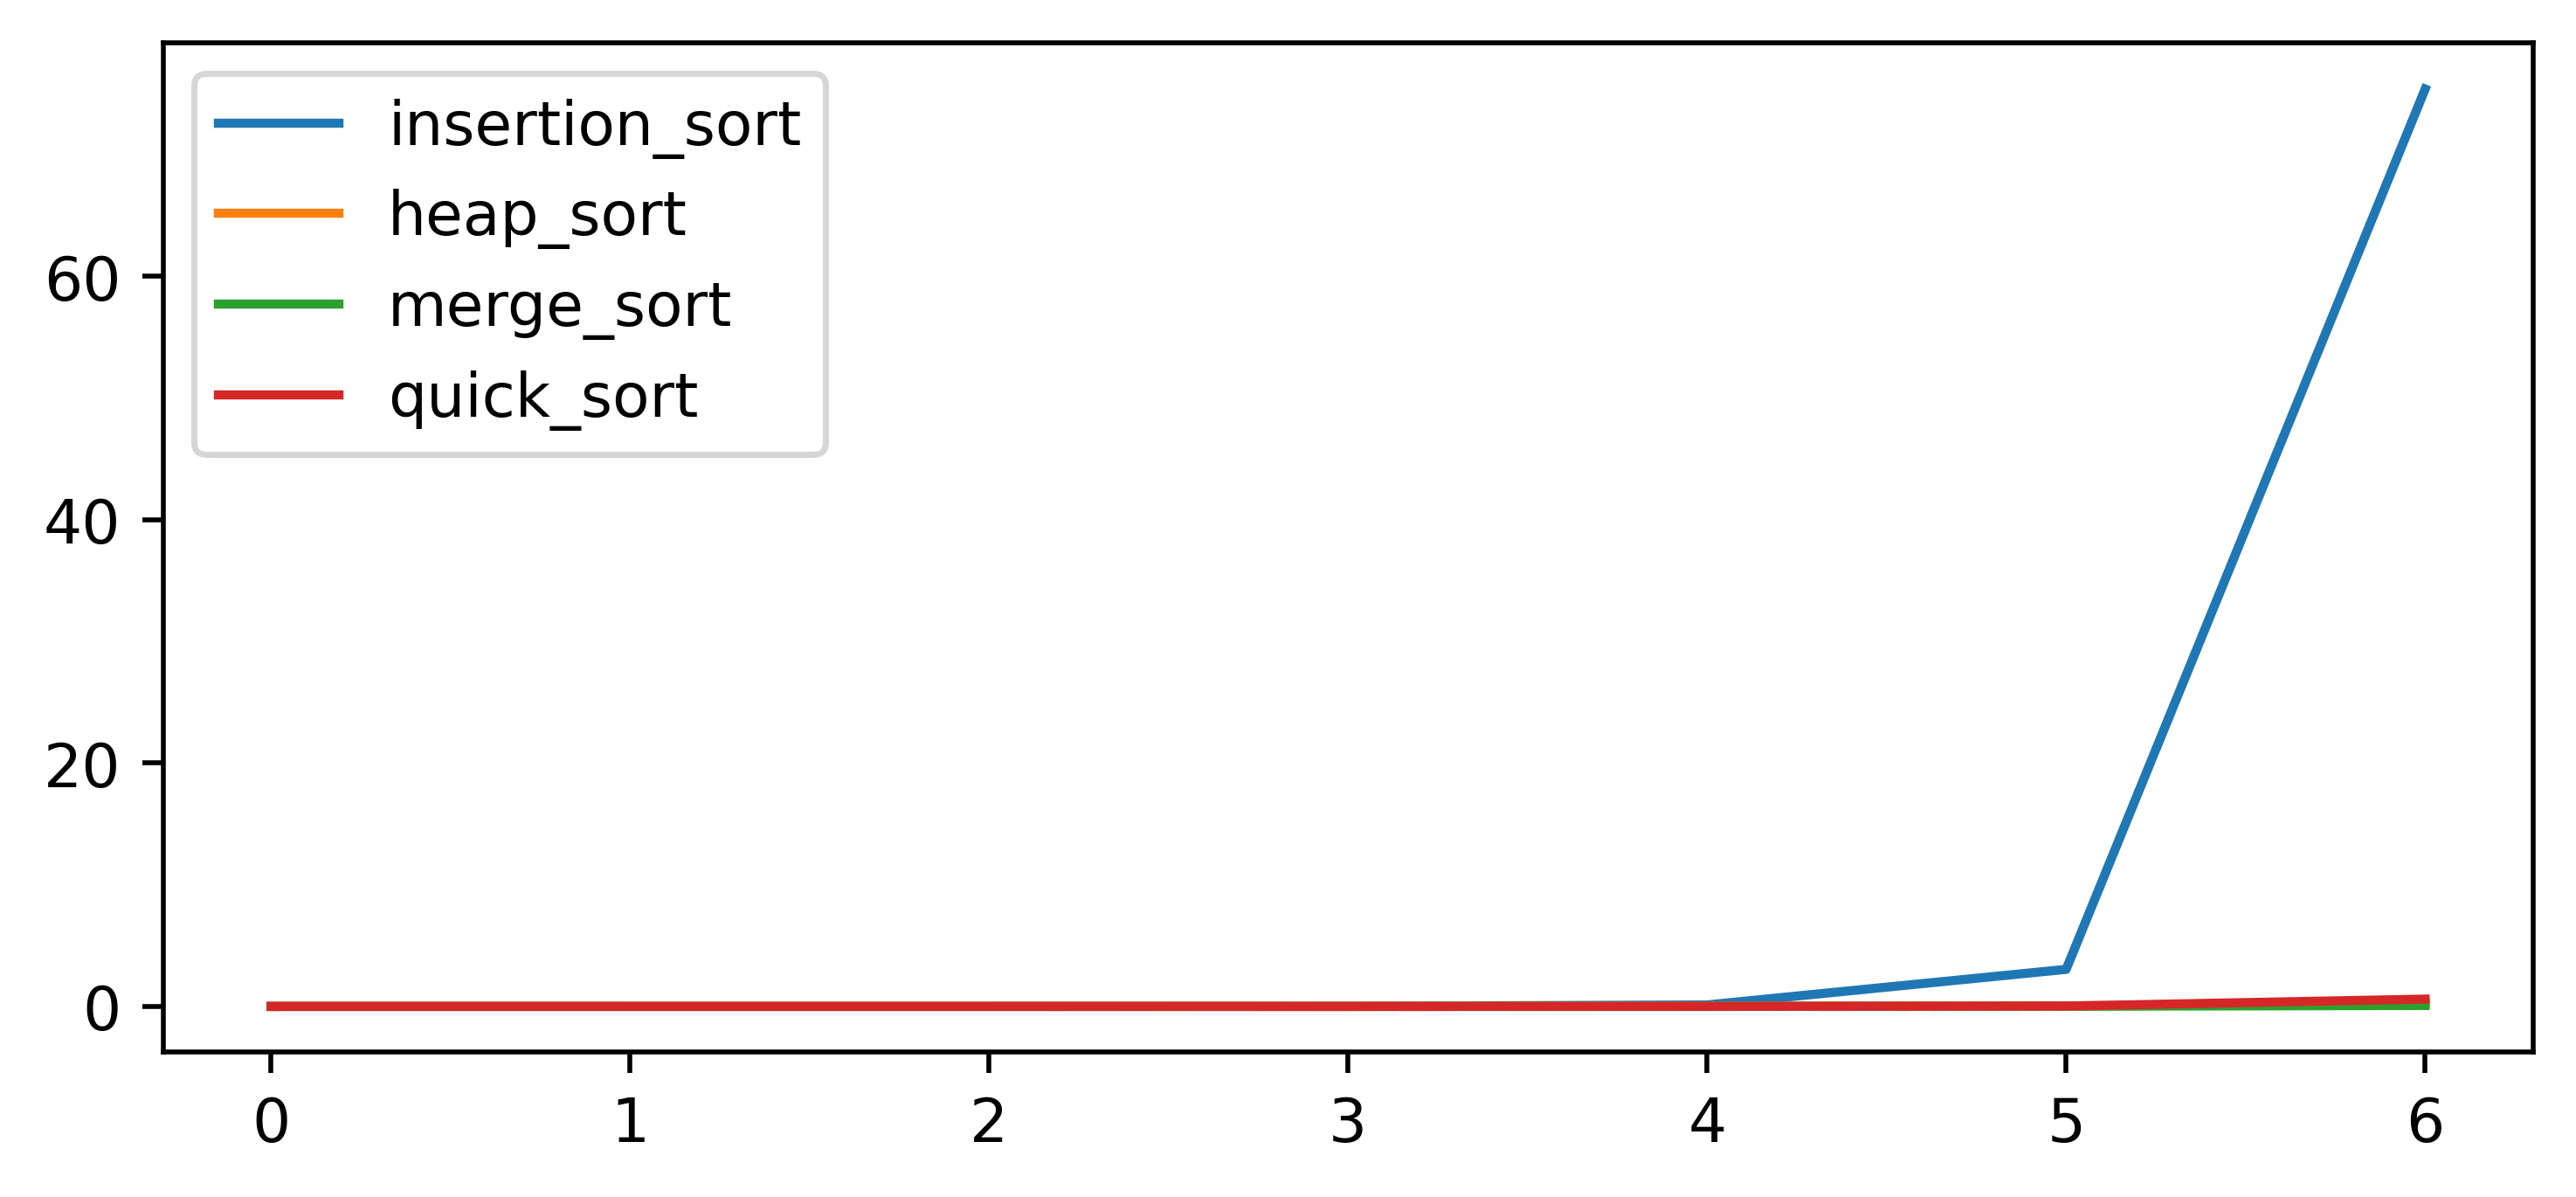

In [147]:


fig,ax = plt.subplots(figsize = (7,3), dpi = 500)

for alg in times:
    t =times[alg]
    ax.plot(list(range(len(t))), t ,label = alg.__name__[len('test_'):]  )
ax.legend();




skip?


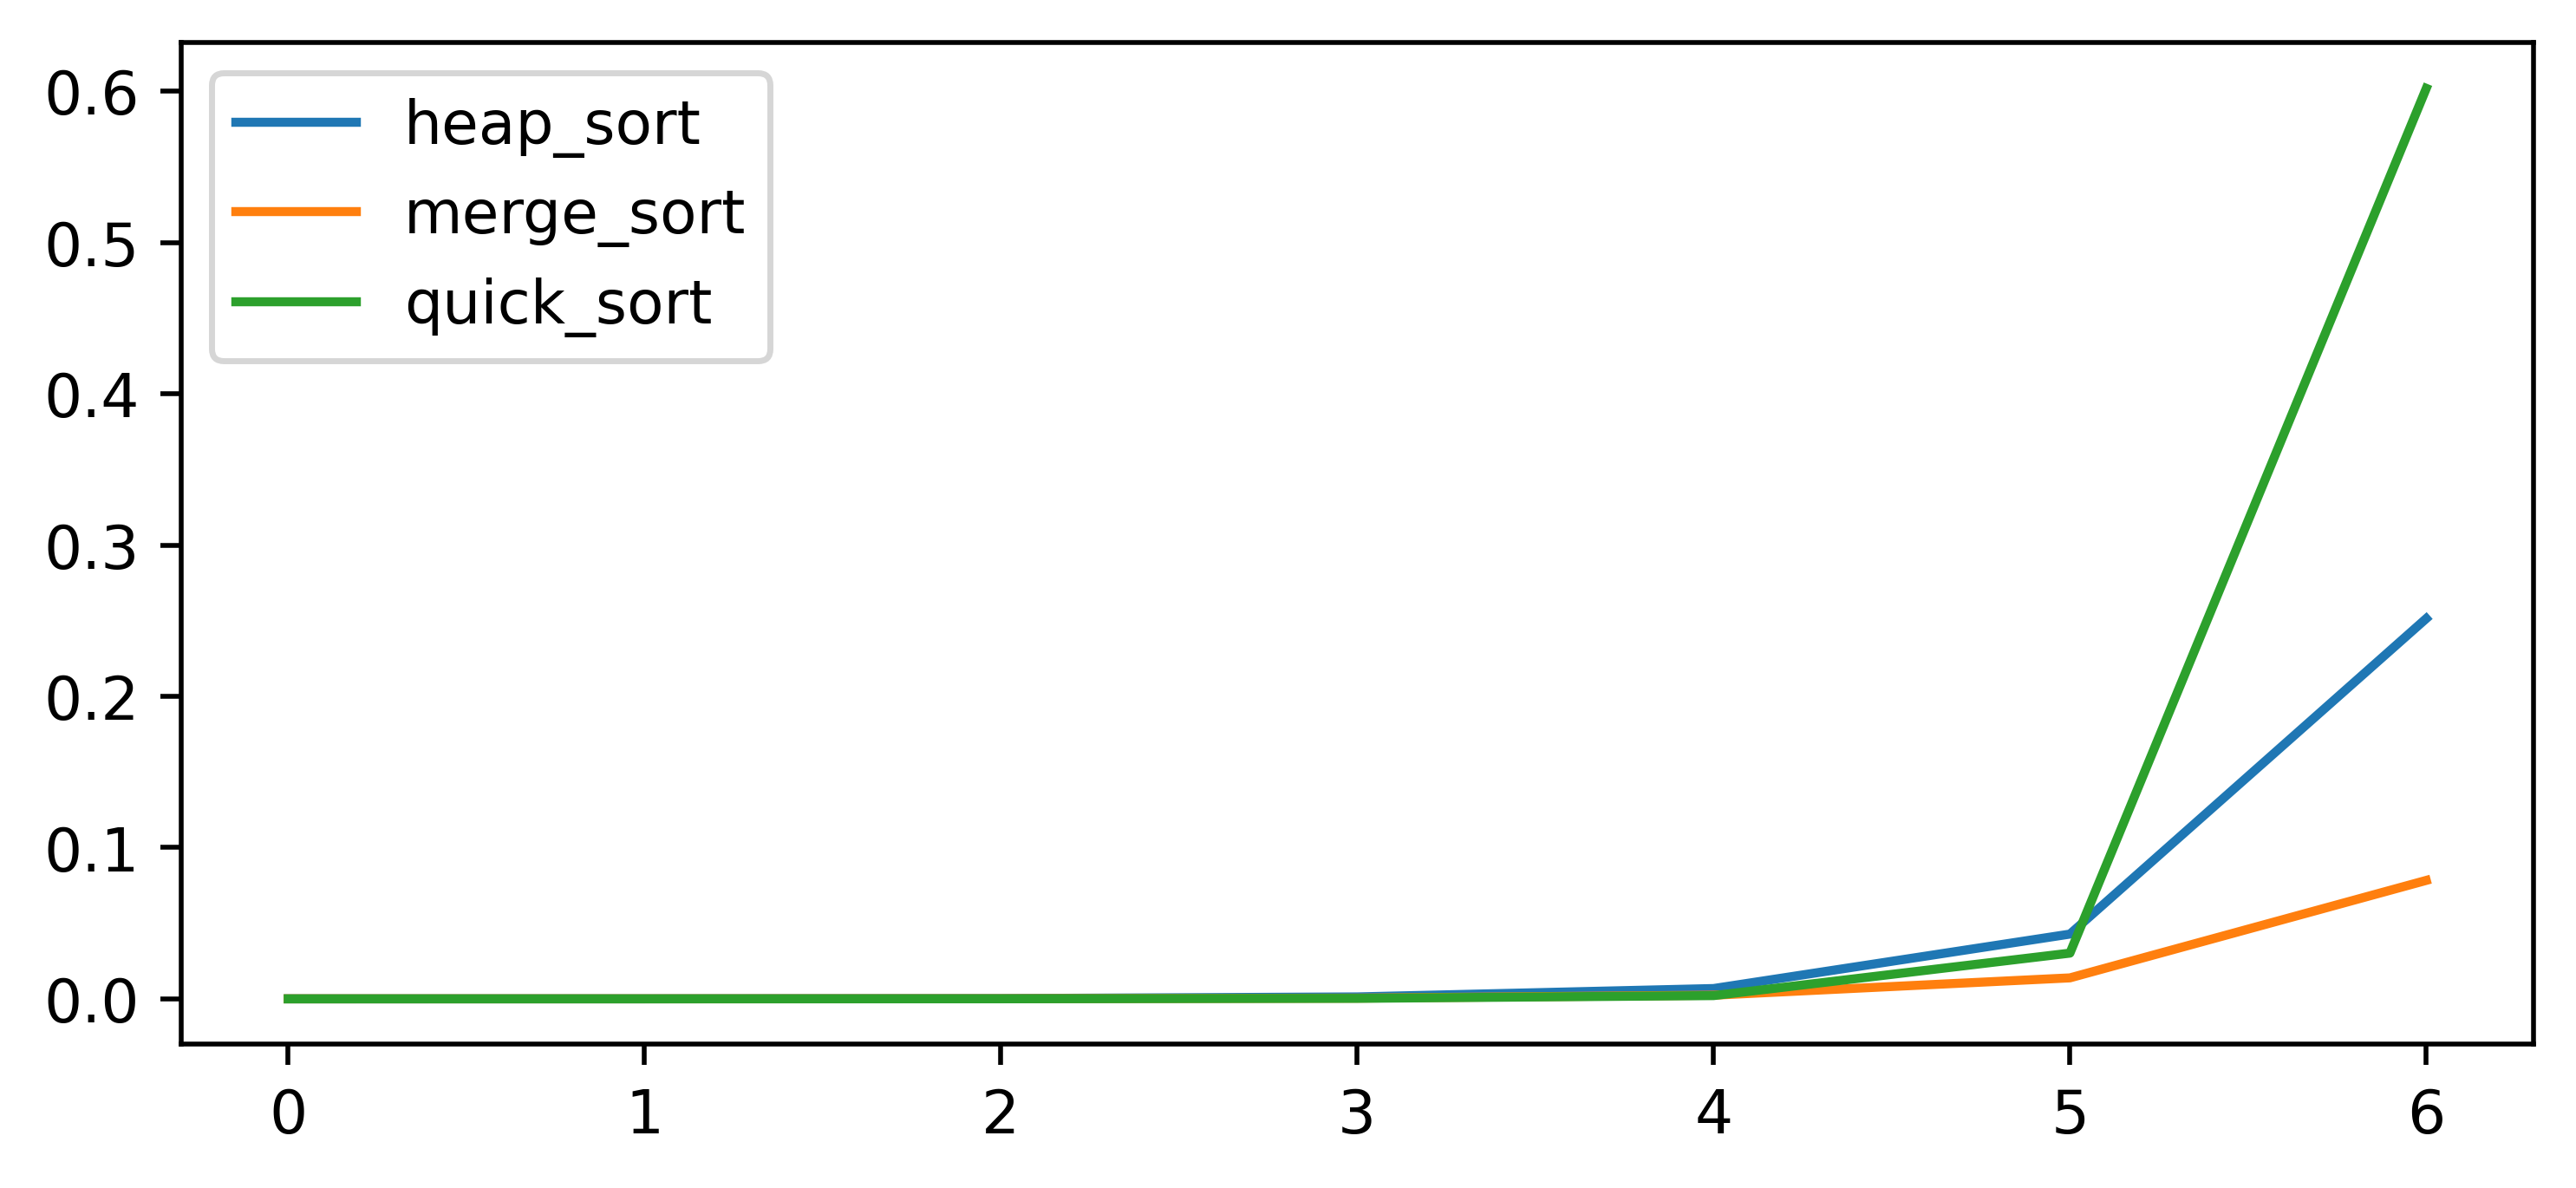

In [156]:
fig,ax = plt.subplots(figsize = (7,3), dpi = 500)

for alg in times:
    if alg is test_insertion_sort:
        print("skip?")
        continue
    else:
        t =times[alg]
        ax.plot(list(range(len(t))), t ,label = alg.__name__[len('test_'):]  )
ax.legend();
